In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('data.csv')
df

,n_semana,semana,visitas,offers,orders
0,1,7/4/2017,508013,51793,8629
1,2,14/4/2017,516606,50952,5608
2,3,21/4/2017,366509,50889,5235
3,4,28/4/2017,404754,51133,6063
4,5,5/5/2017,419576,51641,6323
5,6,12/5/2017,462115,52121,7753
6,7,19/5/2017,491091,59511,9008
7,8,26/5/2017,701321,68818,12336
8,9,2/6/2017,651450,69521,13553
9,10,9/6/2017,627048,68604,13175


In [3]:
df_transf = df.drop(['semana'],axis=1)

#novas colunas
df_transf['off_lag1'] = pd.Series([( df_transf['offers'][i-1] if i > 0 else 0 ) for i,x in enumerate(df_transf['offers'].values)], index=df_transf.index)
df_transf['vis_lag1'] = pd.Series([( df_transf['visitas'][i-1] if i > 0 else 0 ) for i,x in enumerate(df_transf['visitas'].values)], index=df_transf.index)
df_transf['off_lag2'] = pd.Series([( df_transf['offers'][i-2] if i > 1 else 0 ) for i,x in enumerate(df_transf['offers'].values)], index=df_transf.index)
df_transf['vis_lag2'] = pd.Series([( df_transf['visitas'][i-2] if i > 1 else 0 ) for i,x in enumerate(df_transf['visitas'].values)], index=df_transf.index)
#df_transf['off_diff'] = pd.Series([(df_transf['offers'][i-1] - df_transf['offers'][i-2] if i > 1 else 0 ) for i,x in enumerate(df_transf['offers'].values)], index=df_transf.index)
#df_transf['vis_diff'] = pd.Series([(df_transf['visitas'][i-1] - df_transf['visitas'][i-2] if i > 1 else 0 ) for i,x in enumerate(df_transf['visitas'].values)], index=df_transf.index)
df_transf['off_diff'] = df_transf['off_lag1'] - df_transf['off_lag2']
df_transf['vis_diff'] = df_transf['vis_lag1'] - df_transf['vis_lag2']
df_transf

,n_semana,visitas,offers,orders,off_lag1,vis_lag1,off_lag2,vis_lag2,off_diff,vis_diff
0,1,508013,51793,8629,0,0,0,0,0,0
1,2,516606,50952,5608,51793,508013,0,0,51793,508013
2,3,366509,50889,5235,50952,516606,51793,508013,-841,8593
3,4,404754,51133,6063,50889,366509,50952,516606,-63,-150097
4,5,419576,51641,6323,51133,404754,50889,366509,244,38245
5,6,462115,52121,7753,51641,419576,51133,404754,508,14822
6,7,491091,59511,9008,52121,462115,51641,419576,480,42539
7,8,701321,68818,12336,59511,491091,52121,462115,7390,28976
8,9,651450,69521,13553,68818,701321,59511,491091,9307,210230
9,10,627048,68604,13175,69521,651450,68818,701321,703,-49871


In [15]:
#min max scaler
scaler = MinMaxScaler(feature_range=(0,1))
df_transf[['visitas','offers','off_lag1','vis_lag1','off_lag2','vis_lag2']] = scaler.fit_transform(df_transf[['visitas','offers','off_lag1','vis_lag1','off_lag2','vis_lag2']])
scaler = MinMaxScaler(feature_range=(-1,1))
df_transf[['off_diff','vis_diff']] = scaler.fit_transform(df_transf[['off_diff','vis_diff']])
df_transf

,n_semana,visitas,offers,orders,off_lag1,vis_lag1,off_lag2,vis_lag2,off_diff,vis_diff
0,1,0.485375,0.022684,8629,0.000000,0.000000,0.000000,0.000000,-0.380834,-0.097706
1,2,0.497361,0.001581,5608,0.578479,0.579290,0.000000,0.000000,1.000000,1.000000
2,3,0.287997,0.000000,5235,0.569086,0.589089,0.578479,0.579290,-0.403255,-0.079139
3,4,0.341344,0.006123,6063,0.568383,0.417932,0.569086,0.589089,-0.382513,-0.422034
4,5,0.362018,0.018870,6323,0.571108,0.461543,0.568383,0.417932,-0.374328,-0.015067
5,6,0.421354,0.030915,7753,0.576782,0.478445,0.571108,0.461543,-0.367290,-0.065679
6,7,0.461771,0.216356,9008,0.582143,0.526952,0.576782,0.478445,-0.368037,-0.005789
7,8,0.755012,0.449901,12336,0.664682,0.559994,0.582143,0.526952,-0.183812,-0.035095
8,9,0.685449,0.467542,13553,0.768633,0.799720,0.664682,0.559994,-0.132703,0.356555
9,10,0.651412,0.444531,13175,0.776485,0.742852,0.768633,0.799720,-0.362091,-0.205467


In [16]:
X = df_transf[['n_semana','visitas','offers','off_lag1','vis_lag1','off_lag2','vis_lag2','off_diff','vis_diff']].values
y = np.ravel(df_transf[['orders']].values)
X

array([[ 1.00000000e+00,  4.85374937e-01,  2.26844998e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -3.80833678e-01, -9.77063279e-02],
       [ 2.00000000e+00,  4.97360933e-01,  1.58088881e-03,
         5.78479443e-01,  5.79290000e-01,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 3.00000000e+00,  2.87997266e-01,  0.00000000e+00,
         5.69086259e-01,  5.89088645e-01,  5.78479443e-01,
         5.79290000e-01, -4.03255262e-01, -7.91387115e-02],
       [ 4.00000000e+00,  3.41343525e-01,  6.12280746e-03,
         5.68382608e-01,  4.17932216e-01,  5.69086259e-01,
         5.89088645e-01, -3.82513297e-01, -4.22033514e-01],
       [ 5.00000000e+00,  3.62018077e-01,  1.88702918e-02,
         5.71107860e-01,  4.61543198e-01,  5.68382608e-01,
         4.17932216e-01, -3.74328486e-01, -1.50671464e-02],
       [ 6.00000000e+00,  4.21353847e-01,  3.09151590e-02,
         5.76781745e-01,  4.78444806e-01,  5.711078

[0 1 2 3 4 5 6 7 8 9]


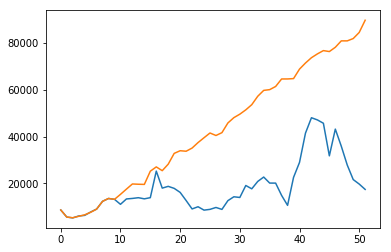

score = -1.1221608445266744
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


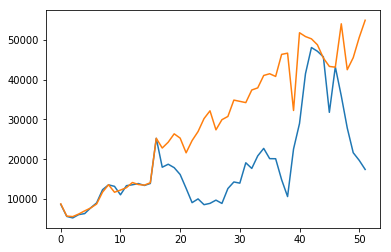

score = -7.4682171166117906
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


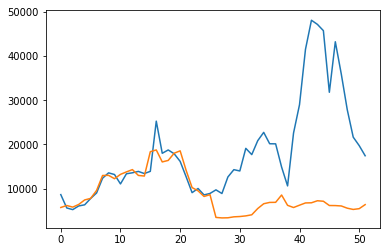

score = -8.667561891045091
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]


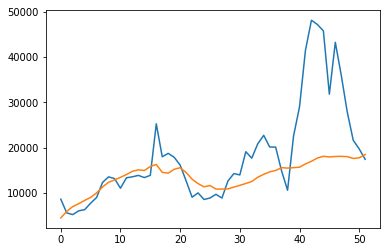

score = -5.913080367907958
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]


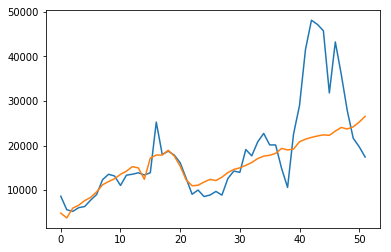

score = -0.9107704638679904
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]


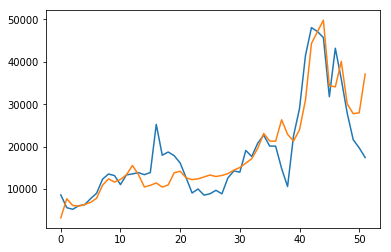

score = -0.14527398255577828
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51]


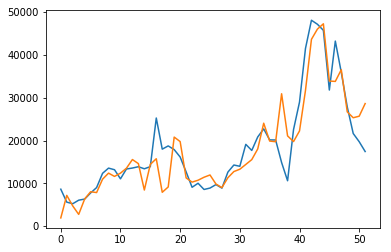

score = 0.4910711487141972

score medio:  -3.955998919633514



In [56]:
from sklearn.model_selection import TimeSeriesSplit
splits = 6
tscv = TimeSeriesSplit(n_splits=splits)

mlpr = MLPRegressor(solver='lbfgs', activation = 'relu', hidden_layer_sizes=(50,50,50,50,50,50,50,50,50,50), alpha=1e-15 ,max_iter = 1e15)
soma = 0

for train_index, test_index in tscv.split(X):
    mlpr.fit(X[train_index], y[train_index])
    score = mlpr.score(X[test_index], y[test_index])
    soma +=score
    print(train_index)
    plt.figure()
    plt.plot(y)
    plt.plot(mlpr.predict(X))
    plt.show()
    print('score =', score)
    
mlpr.fit(X, y)
score = mlpr.score(X[test_index], y[test_index])
soma +=score
print(np.arange(52))
plt.figure()
plt.plot(y)
plt.plot(mlpr.predict(X))
plt.show()
print('score =', score)

print ('\nscore medio: ',soma/splits)
print('')